In [9]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        #print(os.path.join(dirname, filename))
        pass
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [10]:
directory_selected = '/kaggle/input/images-dataset/data/bike'
imgs = os.listdir(directory_selected)

In [30]:
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img

# Your directory
directory_selected = '/kaggle/input/images-dataset/data/bike'
imgs = os.listdir(directory_selected)

# Take first 5 images
first_5 = imgs[:2]

def get_kwargs_understand_augmentations(**kwargs):
    # Define augmentation generator
    datagen = ImageDataGenerator(
        **kwargs
    )
    
    # Loop over 5 images
    for idx, img_name in enumerate(first_5):
        img_path = os.path.join(directory_selected, img_name)
    
        # Load and preprocess image
        img = load_img(img_path, target_size=(150, 150))
        x = img_to_array(img)
        x = x.reshape((1,) + x.shape)
    
        # Plot original
        plt.figure(figsize=(10, 2))
        plt.subplot(1, 6, 1)
        plt.imshow(img)
        plt.title("Original")
        plt.axis("off")
    
        # Generate 5 augmented versions
        aug_iter = datagen.flow(x, batch_size=1)
        for i in range(5):
            batch = next(aug_iter)
            plt.subplot(1, 6, i+2)
            plt.imshow(array_to_img(batch[0]))
            plt.title(f"Aug {i+1}")
            plt.axis("off")
    
        plt.suptitle(f"Image {idx+1}")
        plt.show()

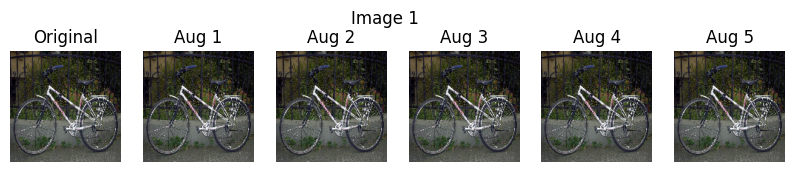

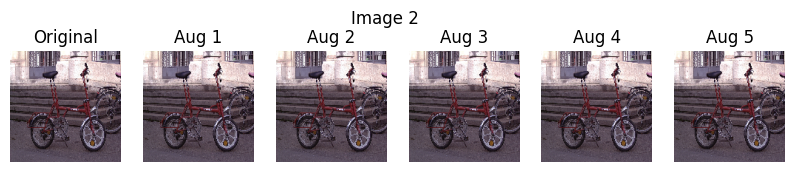

In [31]:
get_kwargs_understand_augmentations()
# here as you can see all images are the same

# [](http://)Options
* rotation_range=30,
* width_shift_range=0.2,
* height_shift_range=0.2,
* zoom_range=0.2,
* horizontal_flip=True,
* fill_mode='nearest'

# rotation_range=30

It randomly rotates the image within the given degree range during training/augmentation.

The value you pass is the maximum rotation angle (in degrees) in both directions.

👉 For example:
rotation_range=30

### means:

* Each time an image is augmented, it can be rotated randomly between -30° and +30°.

* So sometimes it will rotate +10°, sometimes -25°, sometimes +5°, etc.

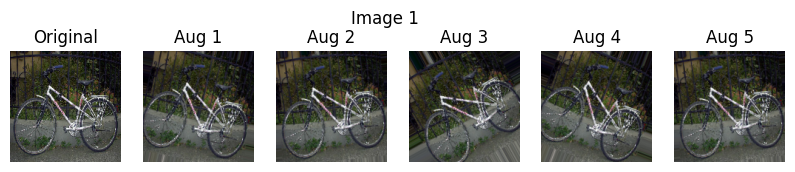

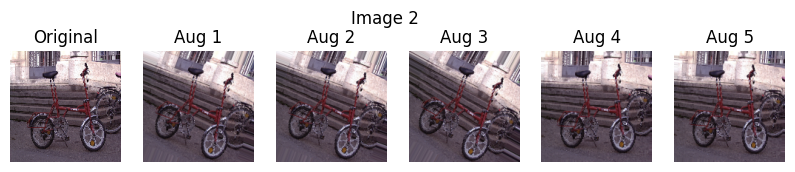

In [32]:
get_kwargs_understand_augmentations(rotation_range=30)

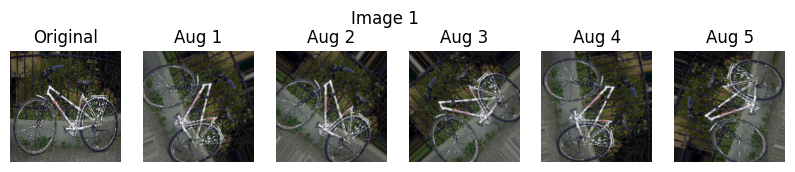

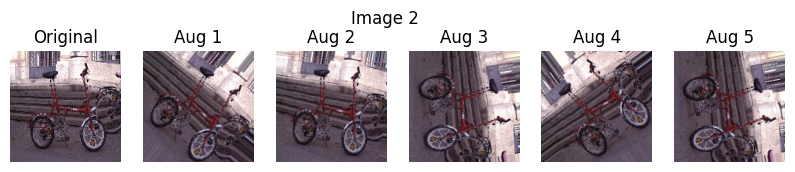

In [33]:
get_kwargs_understand_augmentations(rotation_range=90)

# width_shift_range=0.2
This controls how much the image can be shifted left or right (horizontally) during augmentation.
If you pass a float value, e.g. 0.2 → it means 20% of the total image width.
The image will be randomly shifted within the range -20% to +20% of the width.

👉 Example:
* Suppose your image is 150 pixels wide:
* width_shift_range=0.2 → image can shift left/right by up to 30 pixels (0.2 × 150).

🔹 Why is this useful?
Makes the model robust when the subject isn’t perfectly centered.

Example:

* In self-driving cars, a pedestrian may appear slightly left/right of the frame.
* In medical imaging, a tumor may not be centered.
* With shifts, the model learns position invariance.

## *# It is really interesting to see width_shift_range shifts vertically while height_shift_range shifts horizontally. I searched why it may happen but found nothing. Maybe you can enlighten me.*

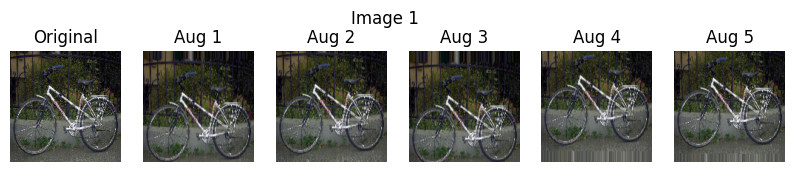

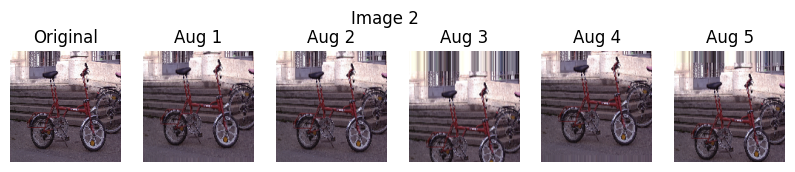

In [34]:
get_kwargs_understand_augmentations(width_shift_range=0.2)

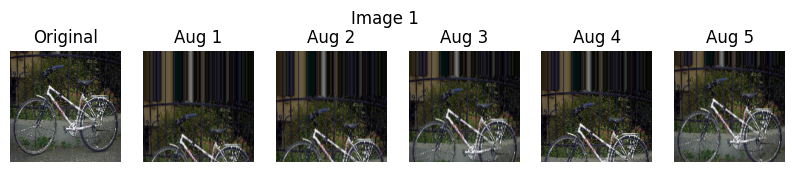

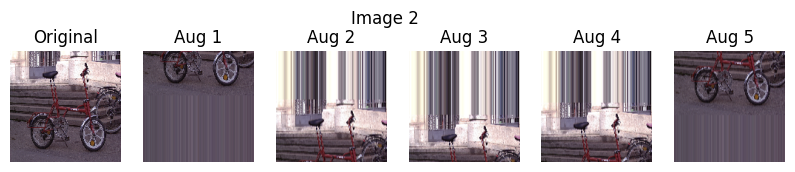

In [23]:
get_kwargs_understand_augmentations(width_shift_range=0.6)

# height_shift_range=0.2 
similar to width shift but should be vertical

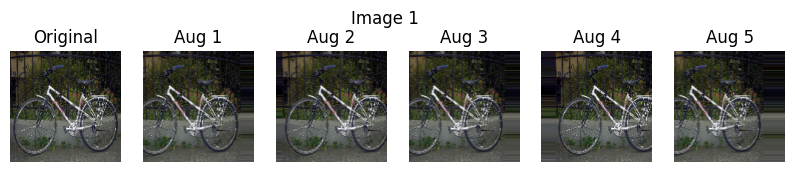

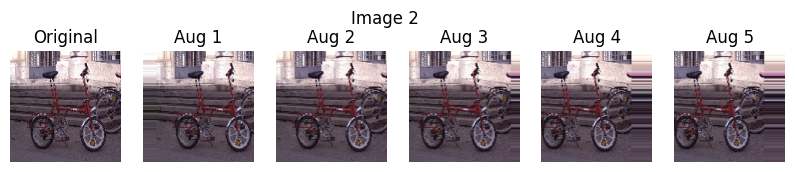

In [25]:
get_kwargs_understand_augmentations(height_shift_range=0.2)

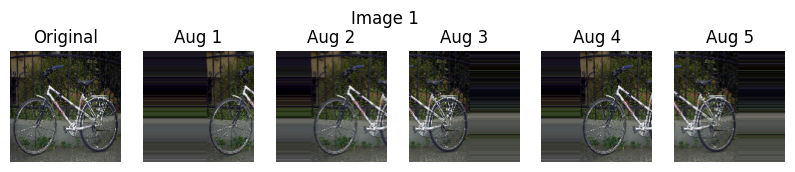

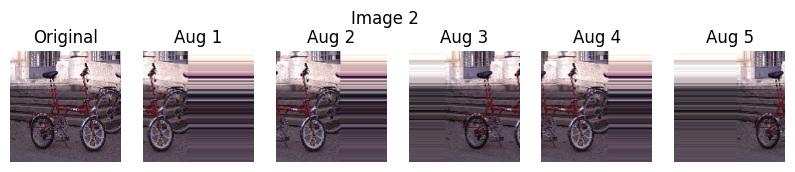

In [36]:
get_kwargs_understand_augmentations(height_shift_range=0.6)

# zoom_range=0.2,
It randomly zooms in or out of the image during augmentation.

The value you pass can be:
* Single float, e.g. 0.2 → means zoom randomly in the range [1 - 0.2, 1 + 0.2], i.e., 0.8x to 1.2x the original size.
* Tuple of floats, e.g. (0.8, 1.5) → directly sets the zoom range.

Each time an image is augmented, it can be:
* Zoomed out to 80% of its size (shows more of background)
* Zoomed in to 120% of its size (cropped closer to center)


Example: A bike may appear closer or farther in real photos.
Example: Faces in images may be bigger or smaller depending on distance.

⚠️ Tip:
* Typical value: 0.1–0.3.
* Too high zoom (like 0.5–2.0) can crop out important parts of the object.

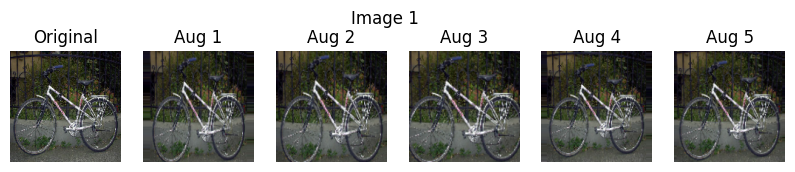

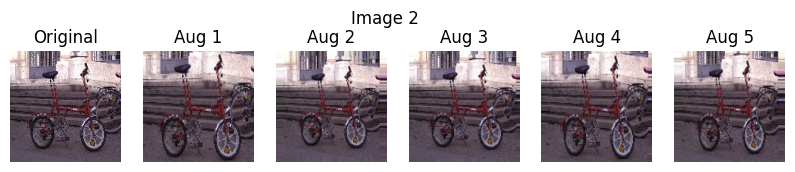

In [37]:
get_kwargs_understand_augmentations(zoom_range=0.2)

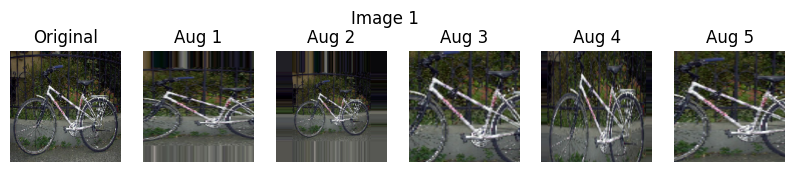

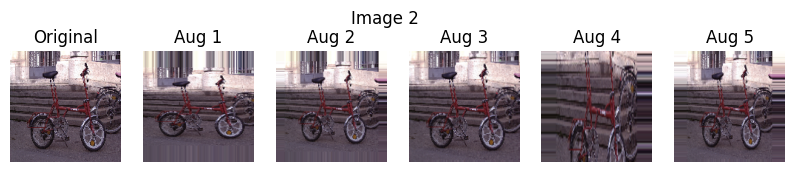

In [38]:
get_kwargs_understand_augmentations(zoom_range=0.6)

# horizontal_flip=True,
Randomly flips the image left ↔ right (mirror image) during augmentation.
Each time an image is passed through the generator, there’s a 50% chance it will be flipped.

🔹 Why it’s useful

Teaches the model to be invariant to horizontal orientation.
Example use cases:
* Cars, bikes, animals: They look the same facing left or right.
* Faces: Often used carefully; flipping is okay for general face recognition but might change handedness for certain tasks.
* Text: Usually don’t flip, because mirrored text changes meaning.


⚠️ Tip:
* Only use if mirroring does not change the class/label meaning.
* Common for objects in natural images, not for digits (like "6" ↔ "9") or text.

# interesting, faces 🧑🏻 👩🏻
🔹 Why horizontal_flip should be used carefully for face recognition
* Faces aren’t perfectly symmetric
* Most human faces have slight asymmetries: a mole, a scar, hair parting, eyebrow shape, etc.
* Flipping can create a “fake” face that doesn’t exist in real life.

Handedness / orientation cues
* Flipping might confuse models that use which side the face is turned toward.
Example: Left-profile vs right-profile may be important for recognition or emotion detection.

Text / accessories
Glasses, earrings, or text on clothing may appear mirrored → could confuse the model.

🔹 When it’s okay

If you are training a generic face classifier (male vs female, smiling vs not smiling) and fine details aren’t crucial.
When you have very few images and want more data variety to prevent overfitting.

🔹 When it’s risky

* Identity recognition: Flipping might slightly reduce accuracy because the flipped face isn’t exactly the real person.
* Emotion detection or subtle facial cues: Flipped expressions could slightly change meaning.

✅ Tip:

* A safer approach: use horizontal flip only on frontal faces and avoid it for profile-heavy datasets.
* Or use other augmentations (rotation, brightness, zoom) to increase data without flipping.

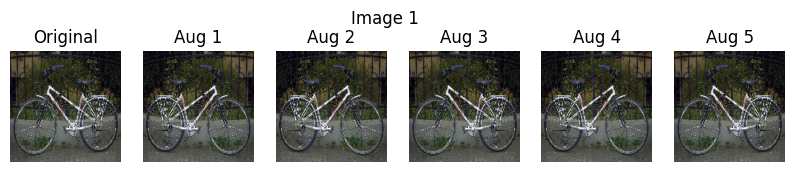

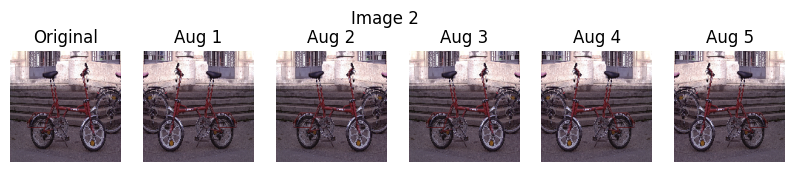

In [39]:
get_kwargs_understand_augmentations(horizontal_flip=True)
# same bike when mirrored


🔹 fill_mode='nearest'

* nearest fills empty pixels with the nearest pixel value from the original image.
* This often produces smooth-looking edges without adding artificial patterns.

### Different modes
* 'constant'	Fill with a constant value (default 0 → black)
* 'nearest'	Fill with the nearest pixel
* 'reflect'	Reflect the image along the edge
* 'wrap'	Wrap the image around (pixels from opposite edge)


🔹 Example
If you rotate an image by 30°:
* Corners of the rotated image are empty.
    * fill_mode='nearest' → corner pixels take the color of the nearest edge pixel.
    * fill_mode='constant', cval=255 → corner pixels become white.

🔹 Why it matters

* Makes augmented images look natural, so the model doesn’t learn artifacts.
* Important for medical imaging, faces, or real-world photos, where weird edges can confuse the network.

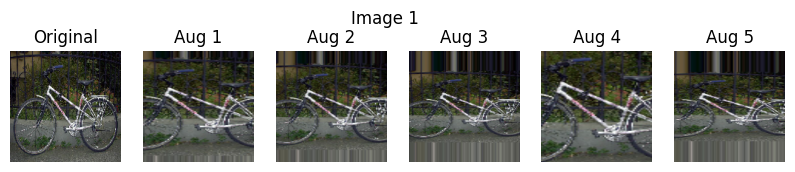

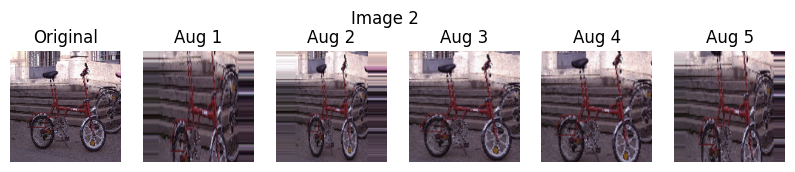

In [40]:
get_kwargs_understand_augmentations(zoom_range=0.6, fill_mode='nearest')

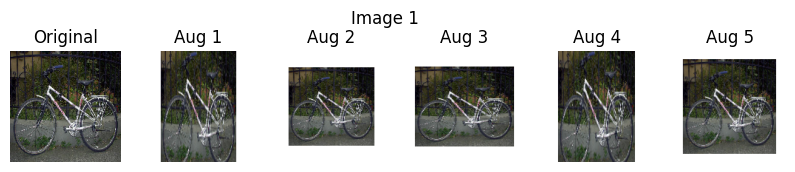

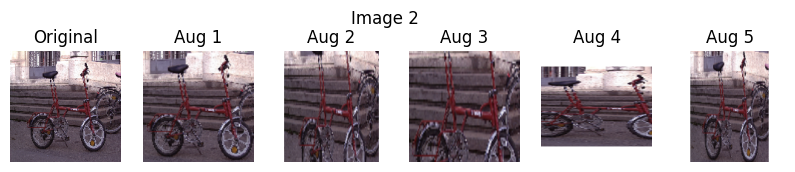

In [41]:
get_kwargs_understand_augmentations(zoom_range=0.6, fill_mode='constant', cval=255) # fills white

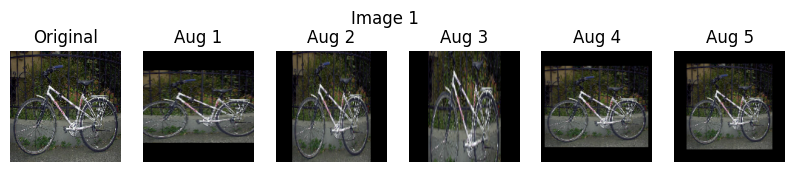

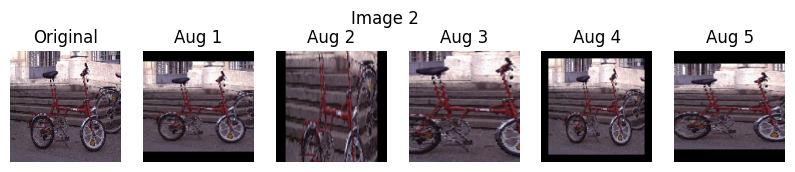

In [42]:
get_kwargs_understand_augmentations(zoom_range=0.6, fill_mode='constant', cval=0) # fills black 

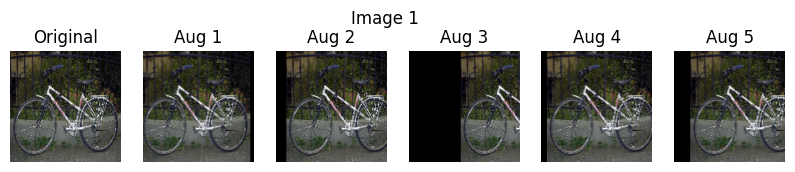

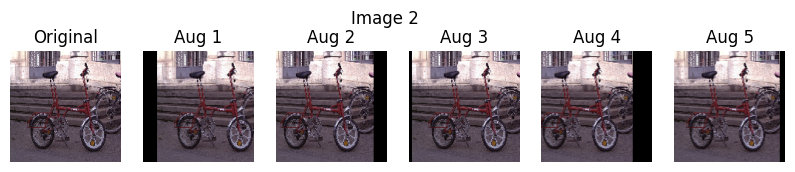

In [43]:
get_kwargs_understand_augmentations(height_shift_range=0.6, fill_mode='constant') 
# as i told before this should have moved vertically but idk why it works like this.

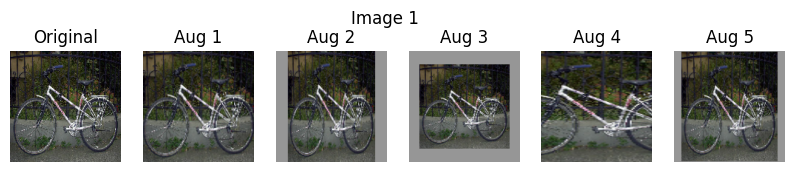

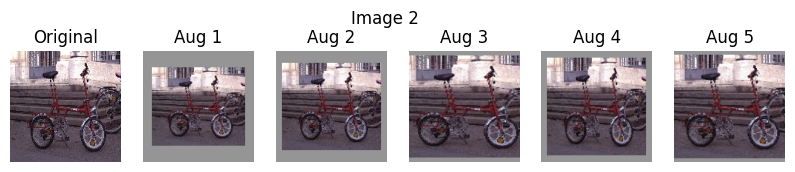

In [48]:
get_kwargs_understand_augmentations(zoom_range=0.6, fill_mode='constant', cval=150)

TypeError: must be real number, not tuple

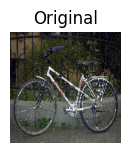

In [47]:
get_kwargs_understand_augmentations(height_shift_range=0.6, fill_mode='constant', cval=(230, 154, 100)) 
# as i told before this should have moved vertically but idk why it works like this.
...
# For colored fills, you need to manually apply them after augmentation:
# now it can't be applied because all in function and need to change a lot but you can apply it in your real scenario

"""
get_kwargs_understand_augmentations(height_shift_range=0.6, fill_mode='constant', cval=0) 

from tensorflow.keras.preprocessing.image import array_to_img
import numpy as np

batch = next(datagen.flow(x, batch_size=1))
img_aug = array_to_img(batch[0])

# Convert to array and fill "empty" pixels manually
arr = np.array(img_aug)
mask = (arr == 0)  # approximate mask of empty pixels
arr[mask] = [230, 154, 100]  # your RGB color
"""
